In [9]:
import pandas as pd

In [150]:
import matplotlib.pyplot as plt

In [75]:
import numpy as np

In [80]:
import seaborn as sns

In [130]:
from pandas.plotting import lag_plot

In [113]:
!pip install statsmodels

     |████████████████████████████████| 10.5MB 13.7MB/s eta 0:00:01   |████████▉                       | 2.9MB 5.5MB/s eta 0:00:02     |█████████████████████████████▋  | 9.7MB 5.5MB/s eta 0:00:01
     |████████████████████████████████| 235kB 13.0MB/s eta 0:00:01


In [114]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
df = pd.read_csv('Table1_All_India_Monsoon.csv')

In [11]:
df.shape



(146, 18)

In [43]:
df_wide = df.melt(id_vars=['year'],
        value_vars=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
        var_name='month',
        value_name='rainfall')

In [14]:
df_wide

,year,month,rainfall
0,1871,January,196
1,1872,January,76
2,1873,January,37
3,1874,January,86
4,1875,January,99
5,1876,January,9
6,1877,January,291
7,1878,January,108
8,1879,January,21
9,1880,January,39


In [70]:
df_wide['date'] = (pd.to_datetime(df_wide['year'].astype(str)  + df_wide['month'], format='%Y%B'))

In [50]:
df_filtered = df_wide[(df_wide['month'] == 'June') | (df_wide['month'] == 'July')| (df_wide['month'] == 'August')| (df_wide['month'] == 'September')]

In [55]:
df_filtered['date']= pd.to_datetime(df_filtered['year'].astype(str)  + df_filtered['month'], format='%Y%B')

/Users/kasturipananjady/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_filtered

,year,month,rainfall,date
730,1871,June,2080,1871-06-01
731,1872,June,1892,1872-06-01
732,1873,June,1130,1873-06-01
733,1874,June,2279,1874-06-01
734,1875,June,1926,1875-06-01
735,1876,June,1233,1876-06-01
736,1877,June,1424,1877-06-01
737,1878,June,1304,1878-06-01
738,1879,June,1900,1879-06-01
739,1880,June,1876,1880-06-01


In [68]:
df_wide.drop( ['year','month'], axis=1)

,rainfall
0,196
1,76
2,37
3,86
4,99
5,9
6,291
7,108
8,21
9,39


In [71]:
df_wide['date'].value_counts()

1963-08-01    1
2006-12-01    1
1986-08-01    1
1961-07-01    1
1898-12-01    1
1938-06-01    1
2009-06-01    1
1961-04-01    1
1873-08-01    1
1876-03-01    1
1924-07-01    1
1896-06-01    1
1935-12-01    1
1958-10-01    1
2014-11-01    1
1899-03-01    1
1942-02-01    1
2003-01-01    1
1981-08-01    1
1911-09-01    1
1893-12-01    1
1933-05-01    1
2004-06-01    1
2015-11-01    1
1956-04-01    1
1967-09-01    1
1915-08-01    1
1904-03-01    1
1963-10-01    1
1952-05-01    1
             ..
2006-06-01    1
1917-03-01    1
1908-01-01    1
1944-10-01    1
2011-11-01    1
1992-12-01    1
1952-04-01    1
1963-09-01    1
2003-03-01    1
1876-01-01    1
1997-12-01    1
1984-11-01    1
1926-12-01    1
1898-11-01    1
1949-10-01    1
1890-03-01    1
1901-08-01    1
1972-08-01    1
1884-12-01    1
1984-01-01    1
1924-06-01    1
1935-11-01    1
1975-05-01    1
1927-03-01    1
1871-01-01    1
2011-06-01    1
1996-10-01    1
1921-12-01    1
1893-11-01    1
1970-01-01    1
Name: date, Length: 1752

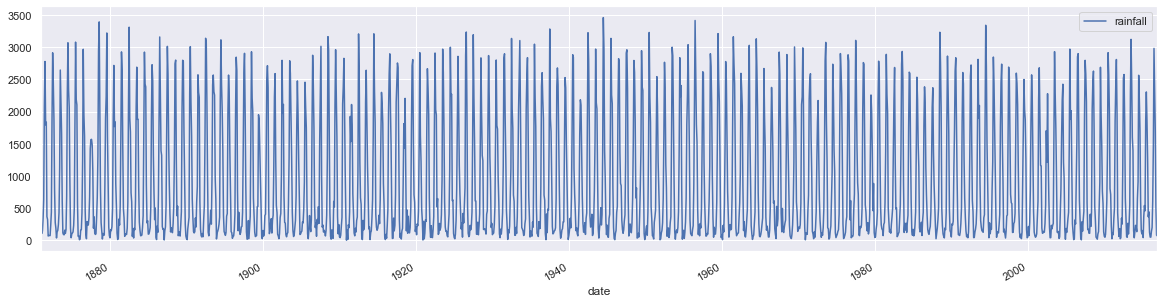

In [102]:
df_wide.plot(x='date', y ='rainfall', figsize = (20,5))

Last 10+ years

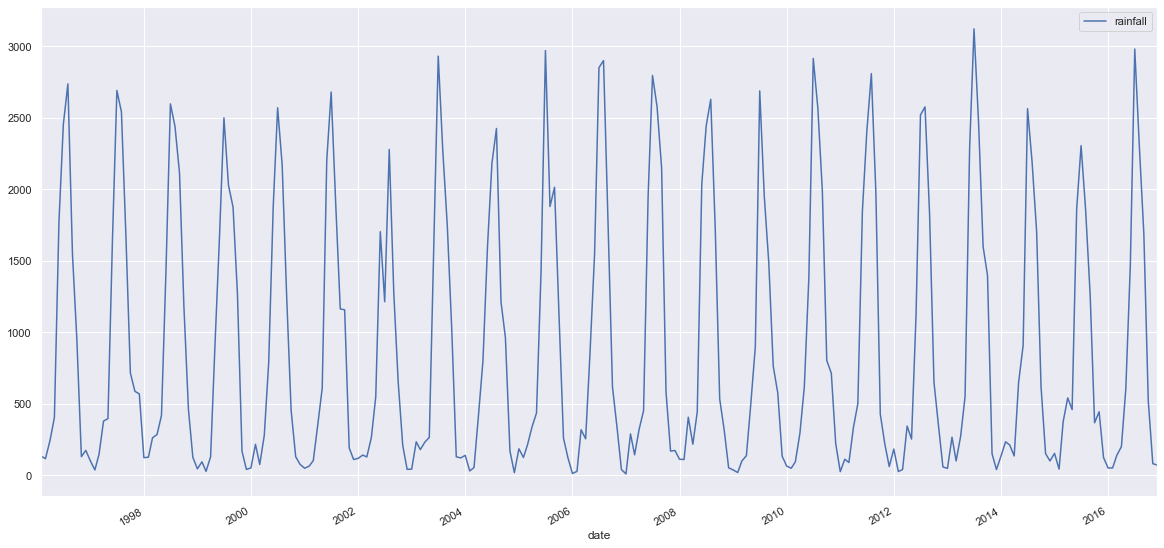

In [439]:
df_wide[df_wide['date']>'1996-01-01'].plot(x='date', y ='rainfall', figsize = (20,10))
plt.savefig('monsoon_last_10.pdf', transparent=True)

Do I see the effect of delayed monsoons? Um. Not here — it's not like the monsoon delay means that it has started raining more in September than it did.

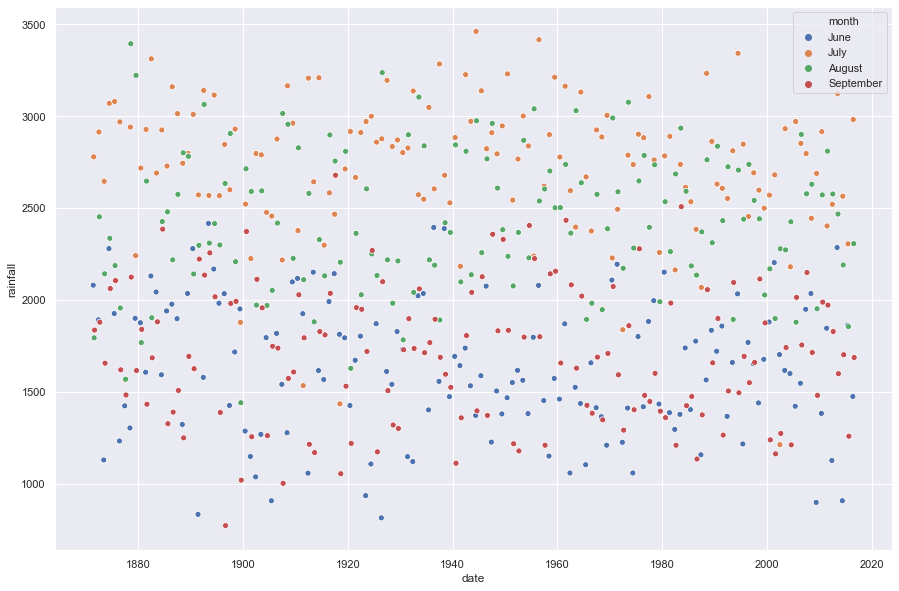

In [208]:
sns.set(rc={'figure.figsize':(15, 10)})
ax = sns.scatterplot(data=df_filtered, x='date', y ='rainfall', hue='month')

But this doesn't tell me anything about good and bad years.

In [62]:
df_filtered[df_filtered['month'] == 'June']['rainfall'].mean()

1630.5753424657535

In [65]:
df_filtered[df_filtered['month'] == 'July']['rainfall'].mean()

2725.349315068493

In [66]:
df_filtered[df_filtered['month'] == 'August']['rainfall'].mean()

2725.349315068493

In [67]:
df_filtered[df_filtered['month'] == 'September']['rainfall'].mean()

1703.3972602739725

Auto-correlation with time lag

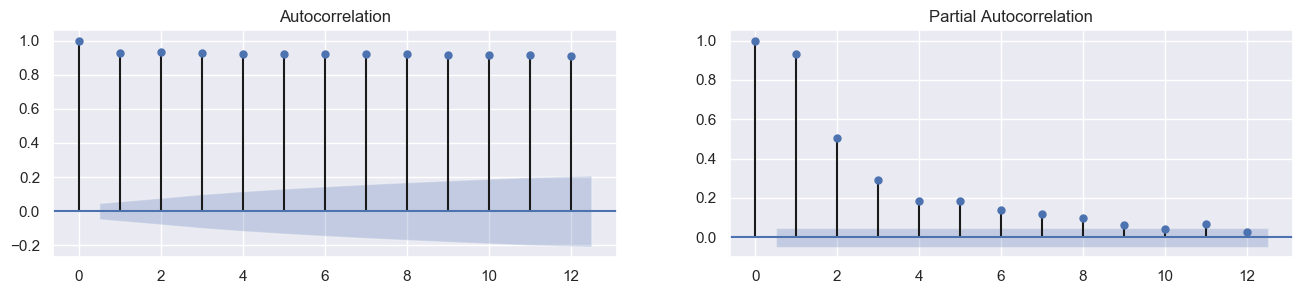

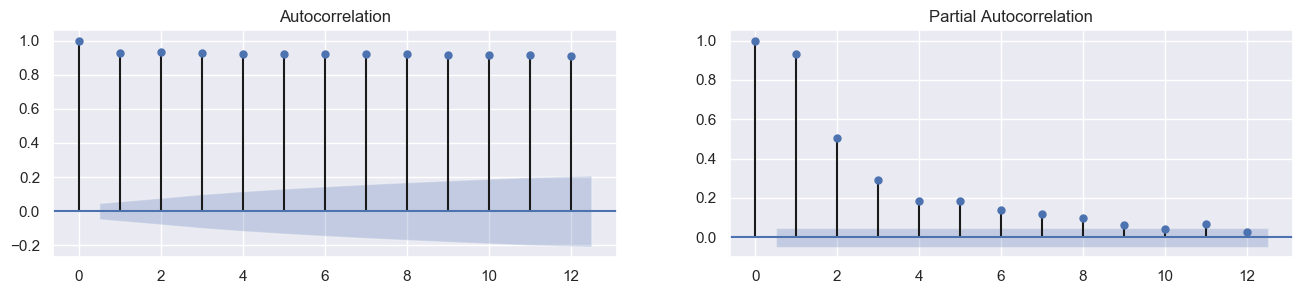

In [136]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_wide.rainfall.tolist(), lags=12, ax=axes[0])
plot_pacf(df_wide.rainfall.tolist(), lags=12, ax=axes[1])

Lag plot

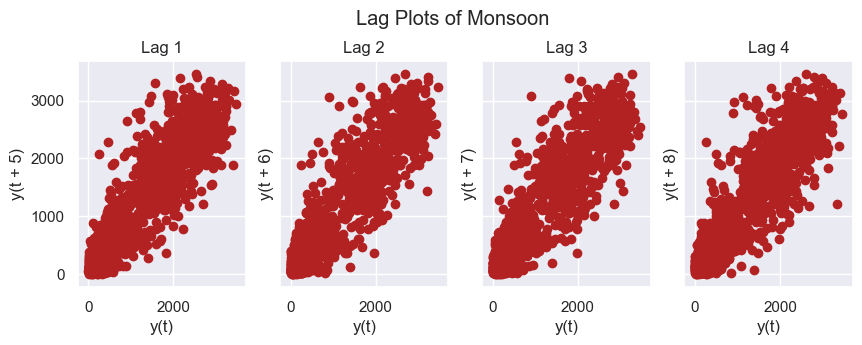

In [134]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_wide.rainfall, lag=i+5, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    
fig.suptitle('Lag Plots of Monsoon', y=1.05)    
plt.show()    

Summer Monsoon months

In [139]:
df_filtered[df_filtered['month'] == 'June'].plot()

,year,month,rainfall,date
730,1871,June,2080,1871-06-01
731,1872,June,1892,1872-06-01
732,1873,June,1130,1873-06-01
733,1874,June,2279,1874-06-01
734,1875,June,1926,1875-06-01
735,1876,June,1233,1876-06-01
736,1877,June,1424,1877-06-01
737,1878,June,1304,1878-06-01
738,1879,June,1900,1879-06-01
739,1880,June,1876,1880-06-01


JJAS

In [ ]:
df = pd.read_csv('Table1_All_India_Monsoon.csv')

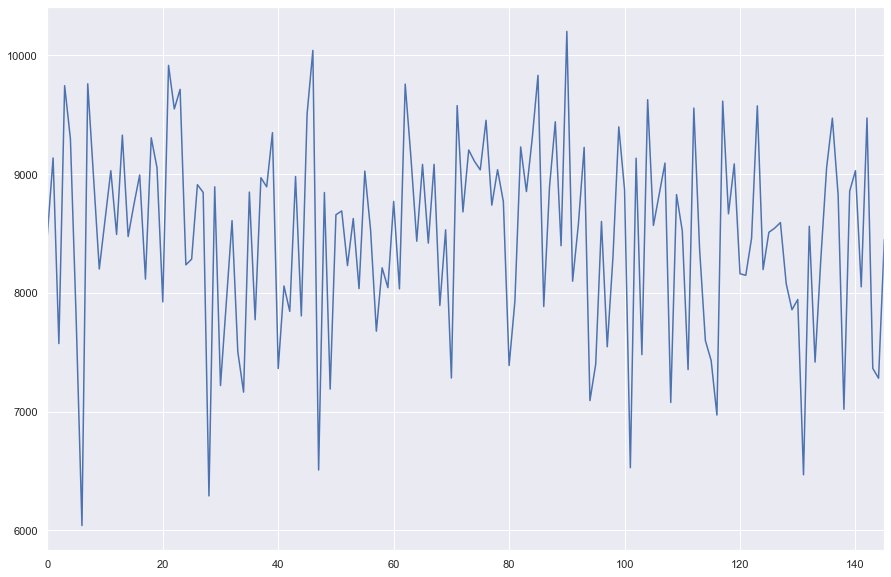

In [144]:
df['JJAS'].plot(x='year')


In [154]:
df

,year,January,February,March,April,May,June,July,August,September,October,November,December,JF,MAM,JJAS,OND,ANN
0,1871,196,107,145,339,636,2080,2778,1794,1836,368,324,67,303,1120,8487,758,10670
1,1872,76,75,73,240,438,1892,2913,2452,1879,785,276,191,151,751,9136,1252,11289
2,1873,37,135,150,243,428,1130,2645,2142,1656,607,115,90,172,821,7573,812,9378
3,1874,86,158,107,169,683,2279,3069,2335,2062,932,187,40,244,959,9745,1159,12106
4,1875,99,114,131,232,506,1926,3079,2187,2105,566,63,71,213,869,9297,700,11078
5,1876,9,21,160,165,425,1233,2968,1956,1620,464,95,25,30,750,7776,584,9141
6,1877,291,234,240,353,674,1424,1564,1569,1483,1078,189,365,525,1267,6040,1632,9464
7,1878,108,91,102,361,665,1304,2940,3393,2124,798,273,140,199,1128,9761,1211,12299
8,1879,21,107,80,82,877,1900,2241,3221,1616,866,205,71,127,1039,8978,1142,11287
9,1880,39,165,151,211,496,1876,2717,1768,1840,877,528,111,204,858,8201,1516,10779


In [147]:
mean = df['JJAS'].mean()

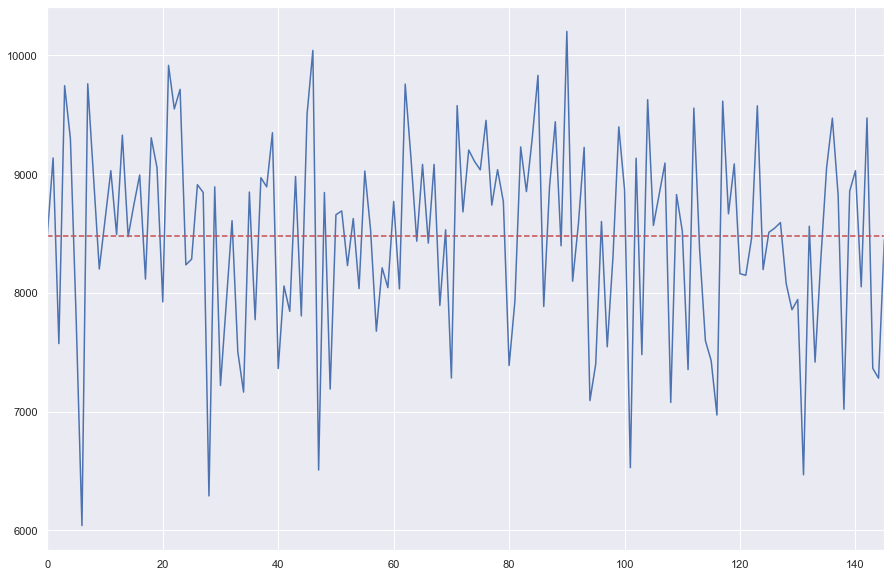

In [155]:
df['JJAS'].plot(x=df['year'])
plt.axhline(mean, color='r', linestyle='--')
plt.show()

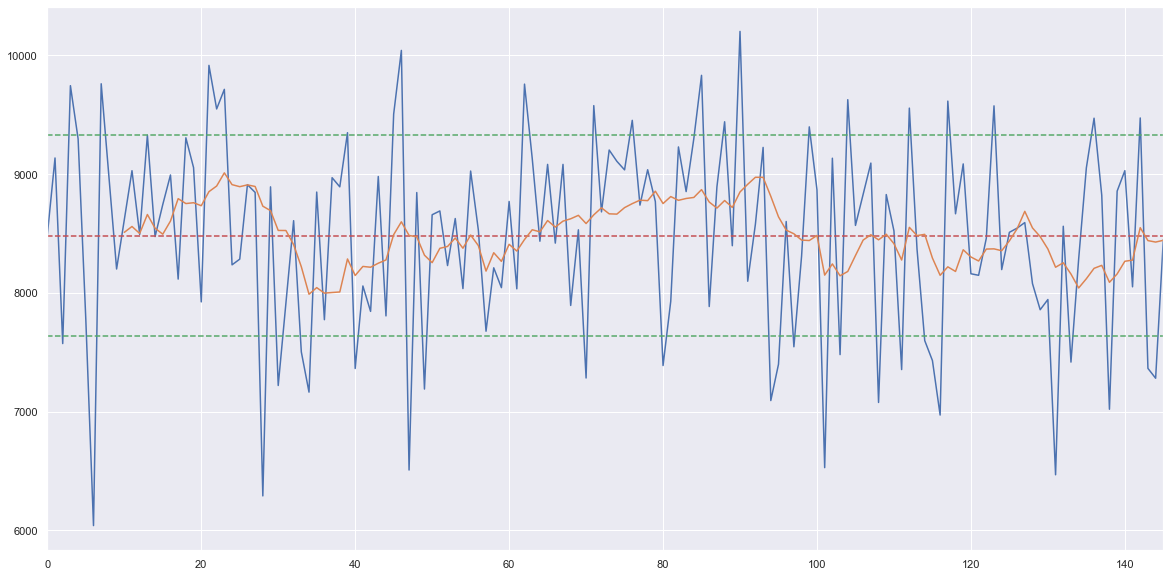

In [455]:
plt.figure(figsize=(20, 10))
df['JJAS'].plot(x='year')
plt.axhline(mean, color='r', linestyle='--')
plt.axhline(mean_plus, color='g', linestyle='--')
plt.axhline(mean_minus, color='g', linestyle='--')
plt.plot(df['JJAS'].rolling(window=11).mean())
#plt.show()
plt.savefig('JJAS_rolling_bounds.pdf', transparent=True)

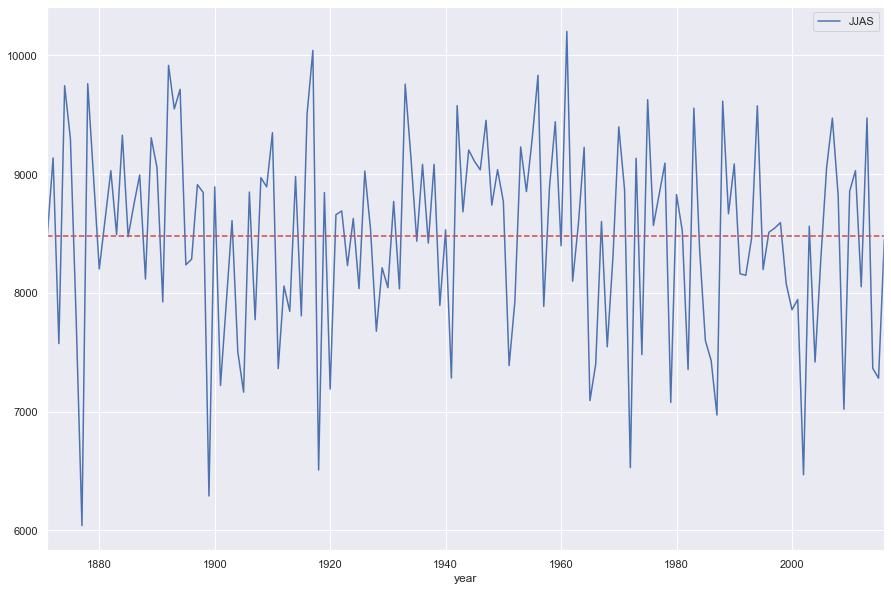

In [157]:
df.plot(x='year', y='JJAS')
plt.axhline(mean, color='r', linestyle='--')
plt.show()

In [158]:
mean_plus = df['JJAS'].mean() + 0.10*df['JJAS'].mean()

In [159]:
mean_minus = df['JJAS'].mean() - 0.10*df['JJAS'].mean()

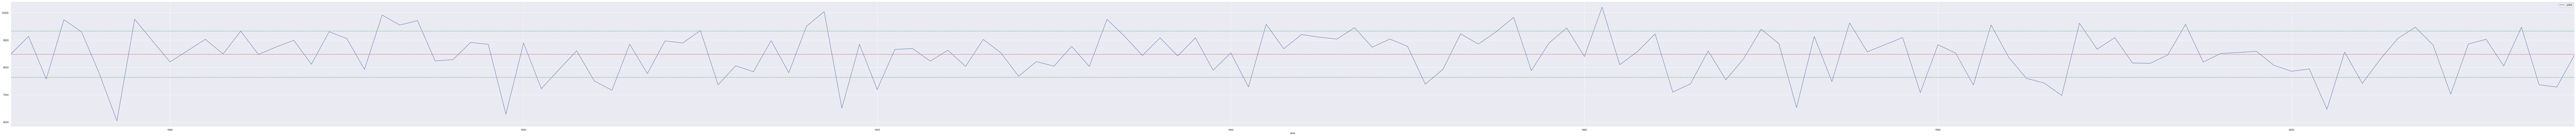

In [442]:
df.plot(x='year', y='JJAS')
plt.axhline(mean, color='r', linestyle='--')
plt.axhline(mean_plus, color='g', linestyle='--')
plt.axhline(mean_minus, color='g', linestyle='--')
plt.show()

In [164]:
df[df['year']<1980]['JJAS'].mean()

8538.128440366972

In [165]:
df[df['year']>1980]['JJAS'].mean()

8300.916666666666

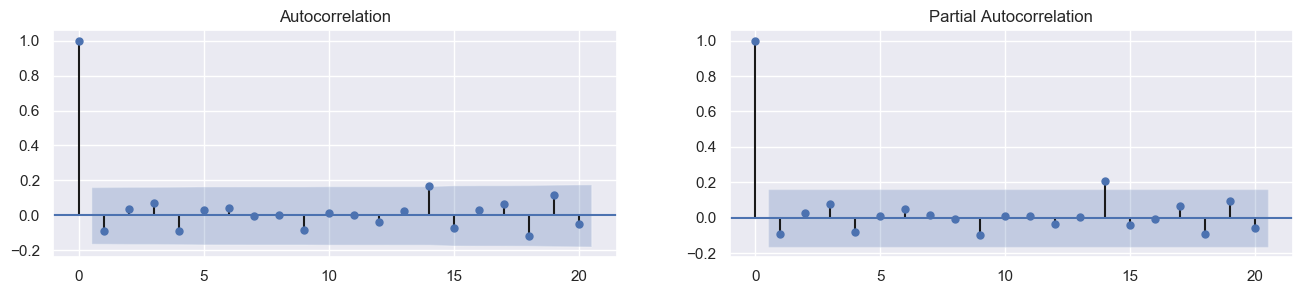

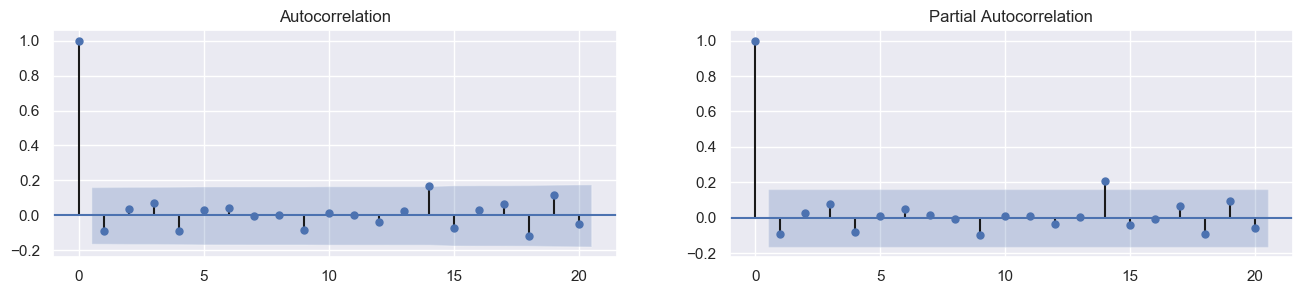

In [168]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.JJAS.tolist(), lags=20, ax=axes[0])
plot_pacf(df.JJAS.tolist(), lags=20, ax=axes[1])

<function matplotlib.pyplot.show(*args, **kw)>

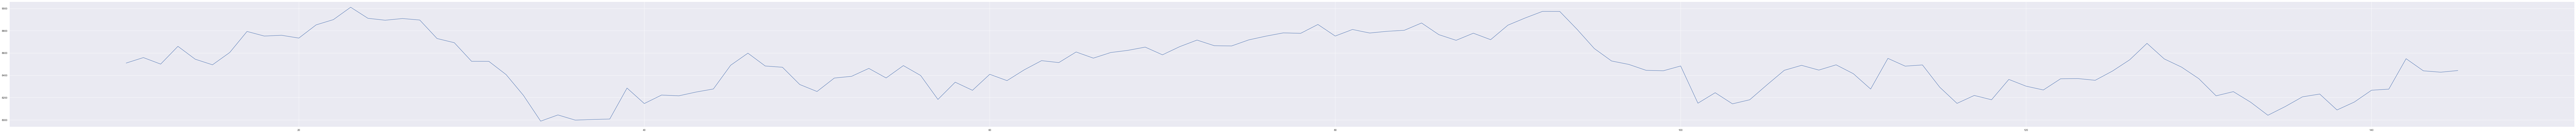

In [408]:
plt.plot(df['JJAS'].rolling(window=11).mean())
plt.show

In [188]:
df['moving_avg'] = df['JJAS'].rolling(window=13).mean()

In [191]:
df['JJAS_transformed'] = df['JJAS'] - mean

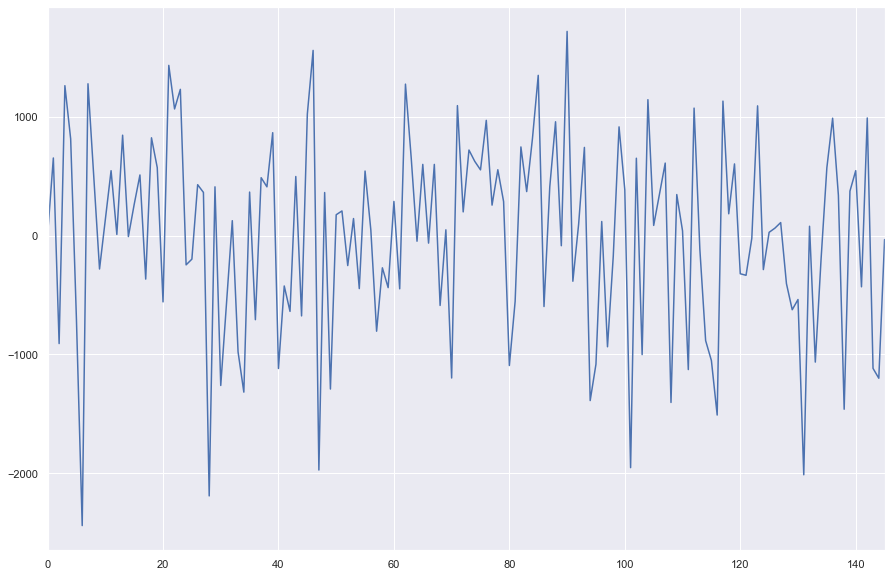

In [193]:
df['JJAS_transformed'].plot()

In [198]:
df.JJAS.std()

834.5228919023832

In [203]:
df[df['year']>1960]['JJAS'].std()

858.3260133130477

In [204]:
df[df['year']<1960]['JJAS'].std()

816.9864944254248

Boxplot

In [460]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x="month", y="rainfall", data=df_wide, palette="250, 15, s=75, l=40, n=9, center="dark")
plt.savefig('month_distribution.pdf', transparent=True)

SyntaxError: invalid syntax (<ipython-input-460-aee33ce4b379>, line 2)

cat plot


In [220]:
june_mean = df_filtered[df_filtered['month'] == 'June'].mean()

In [269]:
june_mean['rainfall']


1630.5753424657535

In [227]:
df_june = df_filtered[df_filtered['month'] == 'June']

In [335]:
def categorize(value, threshold):
    if value > 0.10* threshold + threshold:
        return "Above Average "
    if value < threshold - 0.10* threshold:
        return "Below Average"
    else:
        return "Average"
    

In [228]:
df_june

,year,month,rainfall,date
730,1871,June,2080,1871-06-01
731,1872,June,1892,1872-06-01
732,1873,June,1130,1873-06-01
733,1874,June,2279,1874-06-01
734,1875,June,1926,1875-06-01
735,1876,June,1233,1876-06-01
736,1877,June,1424,1877-06-01
737,1878,June,1304,1878-06-01
738,1879,June,1900,1879-06-01
739,1880,June,1876,1880-06-01


In [315]:
df_june['category'] = df_june['rainfall'].apply(lambda x: categorize(x, june_mean['rainfall']))

/Users/kasturipananjady/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [226]:
df_filtered.dtypes

year                 int64
month               object
rainfall             int64
date        datetime64[ns]
dtype: object

In [268]:

df_june['rainfall'].apply(lambda x: classify_june(x, number)).value_counts()

yes    70
Name: rainfall, dtype: int64

In [267]:
def classify_june(value, number):
    if value>1630.575342+16:
        return "yes"

In [276]:
df_july = df_filtered[df_filtered['month'] == 'July']

In [281]:
df_july['rainfall'].mean()

2725.349315068493

In [336]:
df_june['category'] = df_june['rainfall'].apply(lambda x: categorize(x, june_mean['rainfall']))

/Users/kasturipananjady/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [337]:
df_july['category'] = df_july['rainfall'].apply(lambda x: categorize(x, df_july['rainfall'].mean()))

/Users/kasturipananjady/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [286]:
df_aug = df_filtered[df_filtered['month'] == 'August']

In [338]:
df_aug['category'] = df_aug['rainfall'].apply(lambda x: categorize(x, df_aug['rainfall'].mean()))

/Users/kasturipananjady/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [330]:
df_june

,year,month,rainfall,date,category
730,1871,June,2080,1871-06-01,Above Average
731,1872,June,1892,1872-06-01,Above Average
732,1873,June,1130,1873-06-01,Average
733,1874,June,2279,1874-06-01,Above Average
734,1875,June,1926,1875-06-01,Above Average
735,1876,June,1233,1876-06-01,Average
736,1877,June,1424,1877-06-01,Average
737,1878,June,1304,1878-06-01,Average
738,1879,June,1900,1879-06-01,Above Average
739,1880,June,1876,1880-06-01,Above Average


In [289]:
df_july

,year,month,rainfall,date,category
876,1871,July,2778,1871-07-01,Normal level
877,1872,July,2913,1872-07-01,Normal level
878,1873,July,2645,1873-07-01,Normal level
879,1874,July,3069,1874-07-01,Flood level
880,1875,July,3079,1875-07-01,Flood level
881,1876,July,2968,1876-07-01,Normal level
882,1877,July,1564,1877-07-01,Drought level
883,1878,July,2940,1878-07-01,Normal level
884,1879,July,2241,1879-07-01,Drought level
885,1880,July,2717,1880-07-01,Normal level


In [325]:
df_aug


,year,month,rainfall,date,category
1022,1871,August,1794,1871-08-01,Drought level
1023,1872,August,2452,1872-08-01,Normal level
1024,1873,August,2142,1873-08-01,Drought level
1025,1874,August,2335,1874-08-01,Normal level
1026,1875,August,2187,1875-08-01,Normal level
1027,1876,August,1956,1876-08-01,Drought level
1028,1877,August,1569,1877-08-01,Drought level
1029,1878,August,3393,1878-08-01,Flood level
1030,1879,August,3221,1879-08-01,Flood level
1031,1880,August,1768,1880-08-01,Drought level


In [339]:
df_categorized = df_june.append(df_july)

In [340]:
df_final_cat = df_categorized.append(df_aug)

In [341]:
df_final_cat

,year,month,rainfall,date,category
730,1871,June,2080,1871-06-01,Above Average
731,1872,June,1892,1872-06-01,Above Average
732,1873,June,1130,1873-06-01,Below Average
733,1874,June,2279,1874-06-01,Above Average
734,1875,June,1926,1875-06-01,Above Average
735,1876,June,1233,1876-06-01,Below Average
736,1877,June,1424,1877-06-01,Below Average
737,1878,June,1304,1878-06-01,Below Average
738,1879,June,1900,1879-06-01,Above Average
739,1880,June,1876,1880-06-01,Above Average


AttributeError: 'PathCollection' object has no property 'plot_kws'

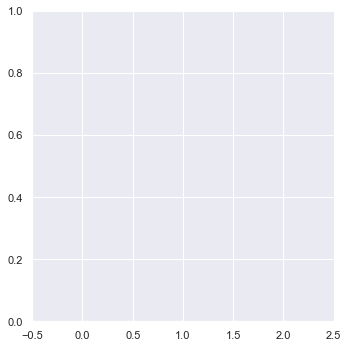

In [458]:
ax = sns.catplot(x="month", y="year", data=df_final_cat, hue = 'category', palette=("RdBu"), legend= 'brief', kind='swarm', plot_kws={'alpha':0.1})
#plt.figure(figsize=(20, 70))
plt.savefig('JJAS_avgs.pdf', transparent=True)

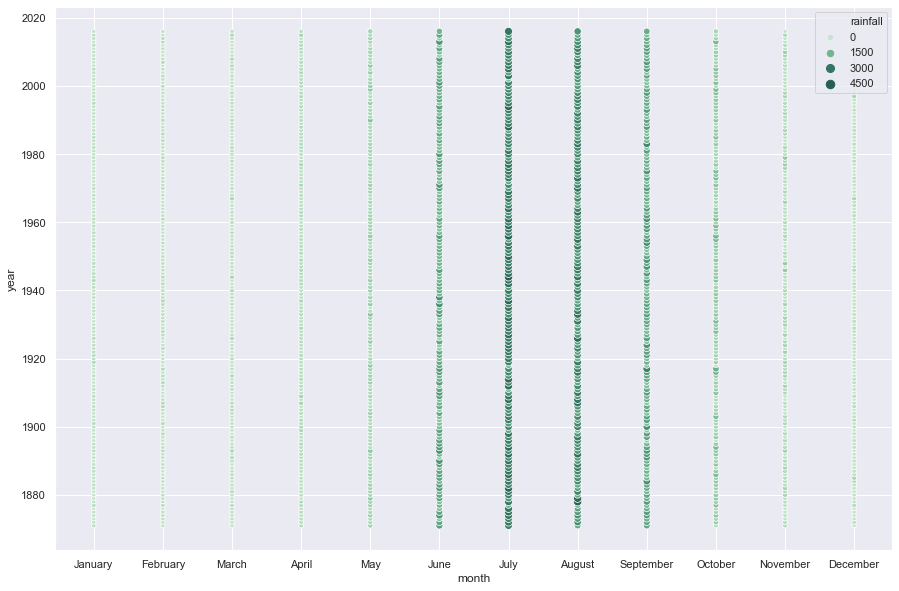

In [314]:
sns.scatterplot(x="month", y="year", data=df_wide, hue = 'rainfall', size = 'rainfall', palette=("ch:2.5,-.2,dark=.3"),legend= 'brief')

July below avergae rainfall vs. overall drought — correlation

In [344]:
def drought_check(value):
    if value - (0.90*mean) < 0:
        return "Drought"
    else:
        return "Not drought"

In [346]:
df['troughs'] = df['JJAS'].apply(lambda x: drought_check(x))

In [347]:
df_july

,year,month,rainfall,date,category
876,1871,July,2778,1871-07-01,Average
877,1872,July,2913,1872-07-01,Average
878,1873,July,2645,1873-07-01,Average
879,1874,July,3069,1874-07-01,Above Average
880,1875,July,3079,1875-07-01,Above Average
881,1876,July,2968,1876-07-01,Average
882,1877,July,1564,1877-07-01,Below Average
883,1878,July,2940,1878-07-01,Average
884,1879,July,2241,1879-07-01,Below Average
885,1880,July,2717,1880-07-01,Average


In [355]:
df_corr = df_july.merge(df,on='year', how='inner' )

In [379]:
df_corr[df_corr['troughs']=='Drought']

,year,month,rainfall,date,category,January,February,March,April,May,...,November,December,JF,MAM,JJAS,OND,ANN,moving_avg,JJAS_transformed,troughs
2,1873,July,2645,1873-07-01,Average,37,135,150,243,428,...,115,90,172,821,7573,812,9378,NaN,-908.623288,Drought
6,1877,July,1564,1877-07-01,Below Average,291,234,240,353,674,...,189,365,525,1267,6040,1632,9464,NaN,-2441.623288,Drought
28,1899,July,1878,1899-07-01,Below Average,58,66,74,522,526,...,41,26,124,1122,6290,574,8109,8703.076923,-2191.623288,Drought
30,1901,July,2225,1901-07-01,Below Average,274,337,113,316,391,...,431,95,611,820,7220,1066,9717,8626.461538,-1261.623288,Drought
33,1904,July,2476,1904-07-01,Average,59,86,203,311,686,...,90,99,145,1200,7503,896,9744,8452.923077,-978.623288,Drought
34,1905,July,2456,1905-07-01,Average,128,144,286,271,476,...,98,25,272,1033,7164,733,9202,8241.230769,-1317.623288,Drought
40,1911,July,1534,1911-07-01,Below Average,162,13,241,196,441,...,415,114,175,878,7363,1254,9670,8061.076923,-1118.623288,Drought
47,1918,July,1435,1918-07-01,Below Average,106,20,145,186,880,...,472,111,126,1211,6508,730,8575,8457.076923,-1973.623288,Drought
49,1920,July,2916,1920-07-01,Average,207,87,255,228,454,...,303,5,294,937,7190,792,9213,8411.846154,-1291.623288,Drought
70,1941,July,2183,1941-07-01,Below Average,196,104,70,231,608,...,272,126,300,909,7283,1079,9570,8513.615385,-1198.623288,Drought


In [ ]:
df_corr[df_corr['troughs']=='Drought']['rainfall'].plot(x=df['year'])

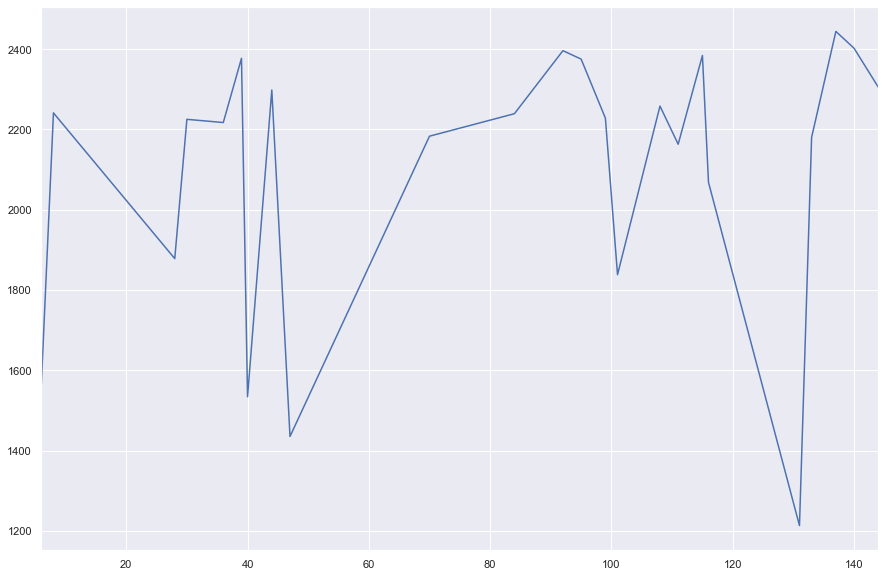

In [367]:
df_corr[df_corr['category']=='Below Average']['rainfall'].plot(x=df['year'])

In [368]:
df_corr[df_corr['category']=='Below Average']['troughs'].value_counts()

Drought        15
Not drought     9
Name: troughs, dtype: int64

In [370]:
df_corr[df_corr['troughs']=='Drought']['category'].value_counts()

Below Average    15
Average          11
Name: category, dtype: int64

In [387]:
list_d_years = df_corr[df_corr['troughs']=='Drought']['year'].tolist()

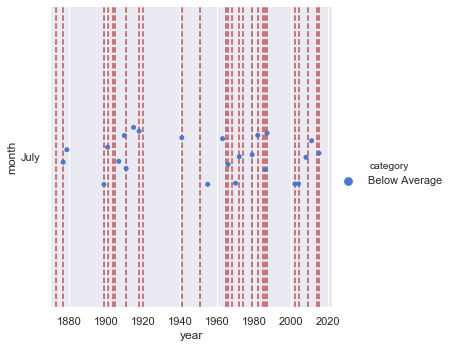

In [459]:
ax = sns.catplot(x="year", y="month", data=df_corr[df_corr['category']=='Below Average'], hue = 'category', palette=("muted"), legend= 'brief')
for year in list_d_years:
    plt.axvline(year, color='r', linestyle='--')
sns.set(rc={'figure.figsize':(200, 10)})
plt.savefig('July_corr.pdf', transparent=True)


Aug: Drought years and below average 

In [392]:
df_aug

,year,month,rainfall,date,category
1022,1871,August,1794,1871-08-01,Below Average
1023,1872,August,2452,1872-08-01,Average
1024,1873,August,2142,1873-08-01,Below Average
1025,1874,August,2335,1874-08-01,Average
1026,1875,August,2187,1875-08-01,Average
1027,1876,August,1956,1876-08-01,Below Average
1028,1877,August,1569,1877-08-01,Below Average
1029,1878,August,3393,1878-08-01,Above Average
1030,1879,August,3221,1879-08-01,Above Average
1031,1880,August,1768,1880-08-01,Below Average


In [391]:
df_corr2 = df_aug.merge(df,on='year', how='inner' )

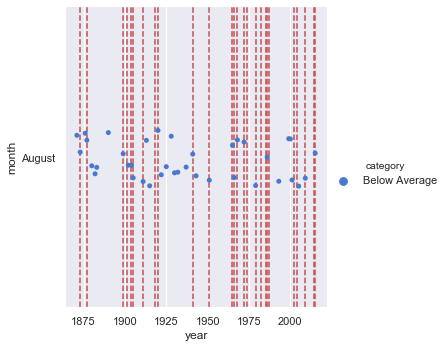

In [437]:
sns.set(rc={'figure.figsize':(200, 10)})
ax = sns.catplot(x="year", y="month", data=df_corr2[df_corr2['category']=='Below Average'], hue = 'category', palette=("muted"), legend= 'brief')
for year in list_d_years:
    plt.axvline(year, color='r', linestyle='--')
plt.savefig('Aug_corr.pdf', transparent=True)


June vs. drought year

In [396]:
df_corr3 = df_june.merge(df,on='year', how='inner' )

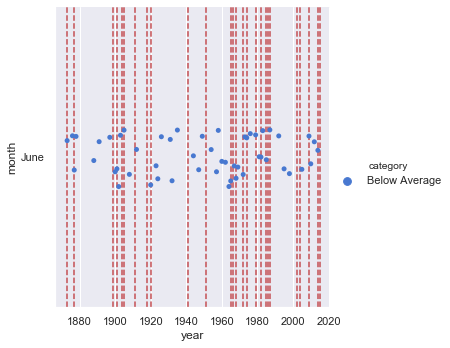

In [438]:
sns.set(rc={'figure.figsize':(200, 10)})
ax = sns.catplot(x="year", y="month", data=df_corr3[df_corr3['category']=='Below Average'], hue = 'category', palette=("muted"), legend= 'brief')
for year in list_d_years:
    plt.axvline(year, color='r', linestyle='--')
plt.savefig('June_corr.pdf', transparent=True)    
